<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/HW2/StationaryTS_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# data ingestion

In [ ]:
# download kaggle economic data
#https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
cd /content

/content


In [ ]:
cd /content/gdrive/MyDrive/.kaggle/


/content/gdrive/MyDrive/.kaggle


In [ ]:
ls kaggle.json


kaggle.json


In [ ]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [ ]:
os.environ

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20220127', 'JPY_PARENT_PID': '57', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [ ]:
!mkdir /content/gdrive/MyDrive/MLTSA22

mkdir: cannot create directory ‘/content/gdrive/MyDrive/MLTSA22’: File exists


In [ ]:
cd /content/gdrive/MyDrive/MLTSA22

/content/gdrive/MyDrive/MLTSA22


In [ ]:
!mkdir HW2 

mkdir: cannot create directory ‘HW2’: File exists


In [ ]:
cd HW2

/content/gdrive/MyDrive/MLTSA22/HW2


In [ ]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs



 99% 489M/492M [00:09<00:00, 72.2MB/s]
100% 492M/492M [00:09<00:00, 54.2MB/s]


In [ ]:
!ls

Data  price-volume-data-for-all-us-stocks-etfs.zip


In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N
^C


In [ ]:
glob.glob("Data/Stocks/*.txt")

['Data/Stocks/stot.us.txt',
 'Data/Stocks/ssnt.us.txt',
 'Data/Stocks/staa.us.txt',
 'Data/Stocks/stdy.us.txt',
 'Data/Stocks/ssbi.us.txt',
 'Data/Stocks/stt_g.us.txt',
 'Data/Stocks/ssw_h.us.txt',
 'Data/Stocks/sumr.us.txt',
 'Data/Stocks/star_e.us.txt',
 'Data/Stocks/stly.us.txt',
 'Data/Stocks/supv.us.txt',
 'Data/Stocks/stt_d.us.txt',
 'Data/Stocks/stb.us.txt',
 'Data/Stocks/stfc.us.txt',
 'Data/Stocks/susc.us.txt',
 'Data/Stocks/sunw.us.txt',
 'Data/Stocks/sui_a.us.txt',
 'Data/Stocks/sypr.us.txt',
 'Data/Stocks/swj.us.txt',
 'Data/Stocks/ssw_e.us.txt',
 'Data/Stocks/sti_e.us.txt',
 'Data/Stocks/swp.us.txt',
 'Data/Stocks/syrs.us.txt',
 'Data/Stocks/sxt.us.txt',
 'Data/Stocks/syy.us.txt',
 'Data/Stocks/srt.us.txt',
 'Data/Stocks/srg.us.txt',
 'Data/Stocks/swx.us.txt',
 'Data/Stocks/ssnc.us.txt',
 'Data/Stocks/srv.us.txt',
 'Data/Stocks/strp.us.txt',
 'Data/Stocks/src.us.txt',
 'Data/Stocks/ssw_g.us.txt',
 'Data/Stocks/staf.us.txt',
 'Data/Stocks/swir.us.txt',
 'Data/Stocks/star_i.

In [ ]:
# use glob to sort the files alphabetically
alltss = []

allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/", 
                                              "")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name}, 
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)
    

Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt


#  data inspection

plot each time series (ts)

In [ ]:
tss.iloc[0], tss.iloc[-1] 

(a.us       36.901
 aa.us      17.779
 aaap.us    24.500
 aaba.us    33.380
 aac.us     22.560
 aal.us     43.524
 aamc.us    20.750
 aame.us     4.796
 aan.us     24.649
 aaoi.us    16.760
 Name: 2015-11-11, dtype: float64, a.us       66.81
 aa.us      43.01
 aaap.us    80.98
 aaba.us    70.56
 aac.us     11.28
 aal.us     45.82
 aamc.us    80.10
 aame.us     3.50
 aan.us     36.59
 aaoi.us    45.30
 Name: 2017-11-10, dtype: float64)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


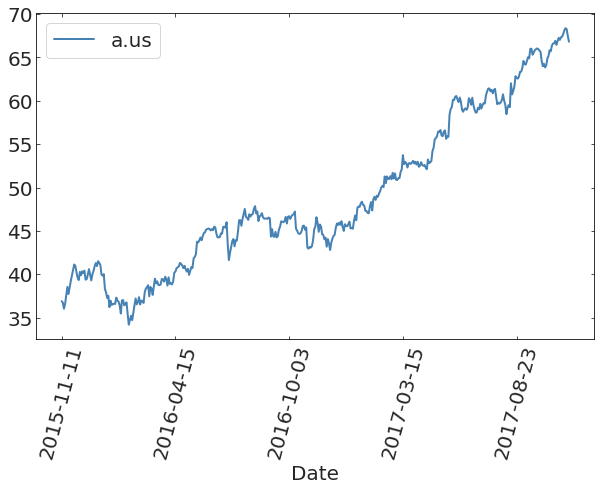

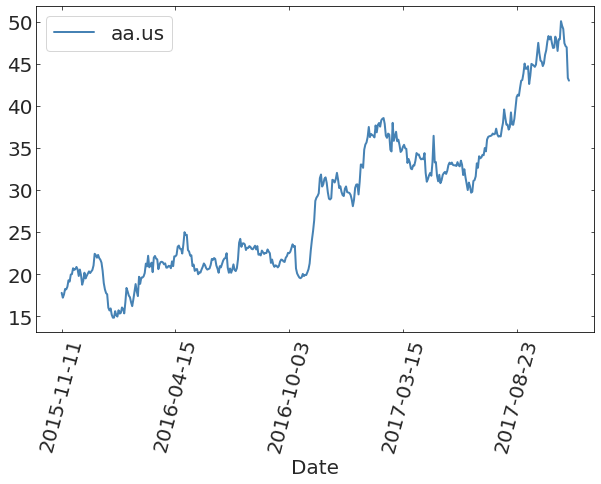

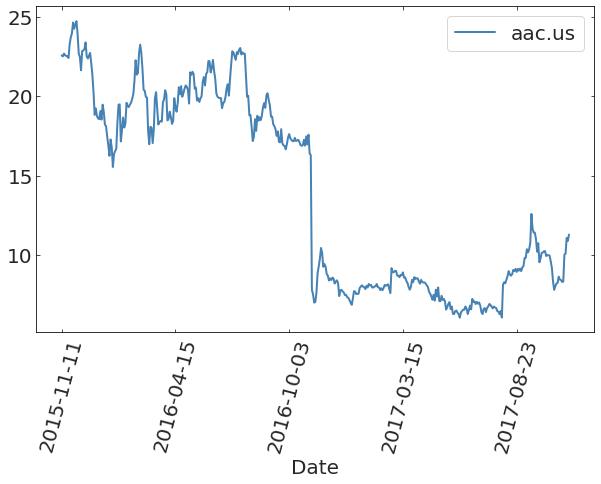

In [ ]:
tss.plot(y="a.us", rot=75, lw=2)
tss.plot(y="aa.us", rot=75, lw=2)
tss.plot(y="aac.us", rot=75, lw=2)



findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


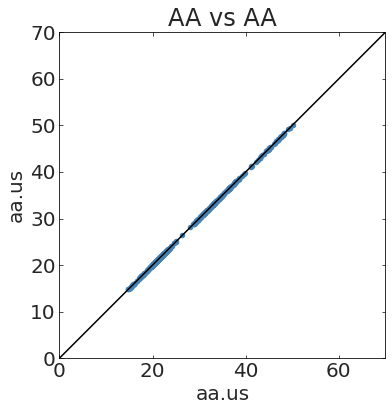

In [ ]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
tss.plot(x="aa.us", y="aa.us", kind="scatter", ax=ax)
ax.set_xlim(0,70)
ax.set_ylim(0,70)
pl.title("AA vs AA")
ax.plot(pl.xlim(), pl.ylim(), "k")

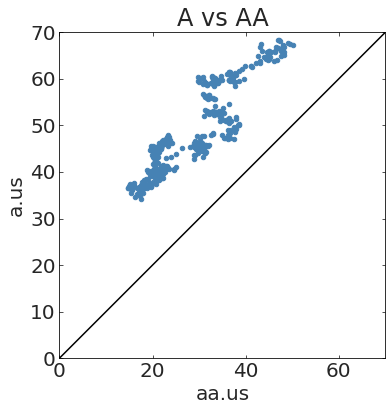

In [ ]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
tss.plot(x="aa.us", y="a.us", kind="scatter", ax=ax)
ax.set_xlim(0,70)
ax.set_ylim(0,70)
pl.title("A vs AA")
ax.plot(pl.xlim(), pl.ylim(), "k")

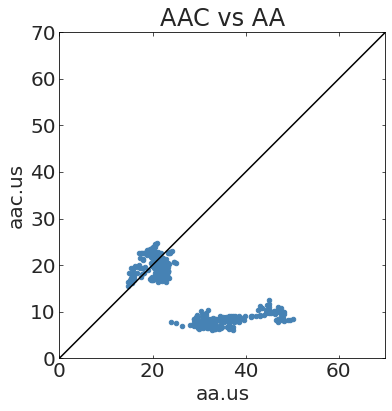

In [ ]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
tss.plot(x="aa.us", y="aac.us", kind="scatter", ax=ax)
ax.set_xlim(0,70)
ax.set_ylim(0,70)
pl.title("AAC vs AA")

ax.plot(pl.xlim(), pl.ylim(), "k")

(447, 10)

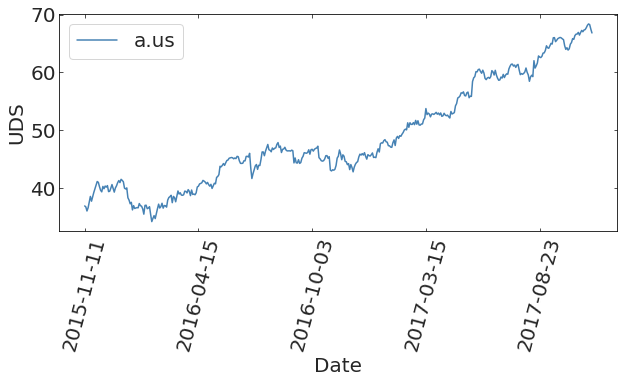

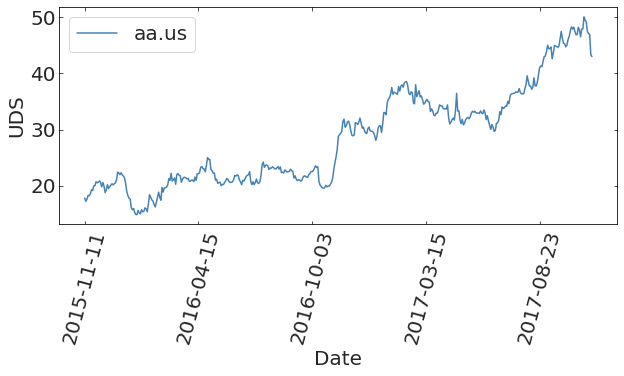

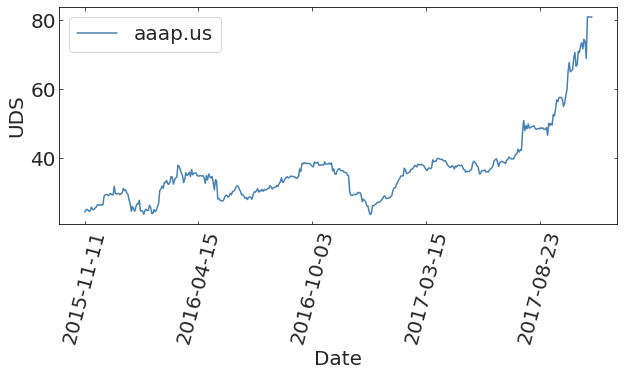

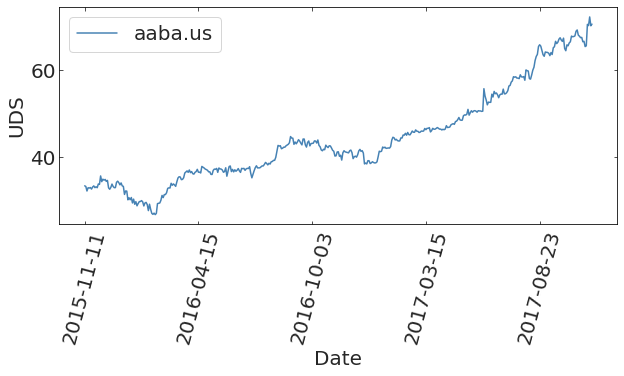

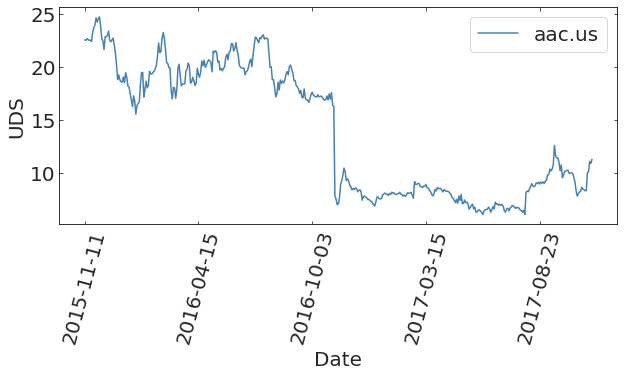

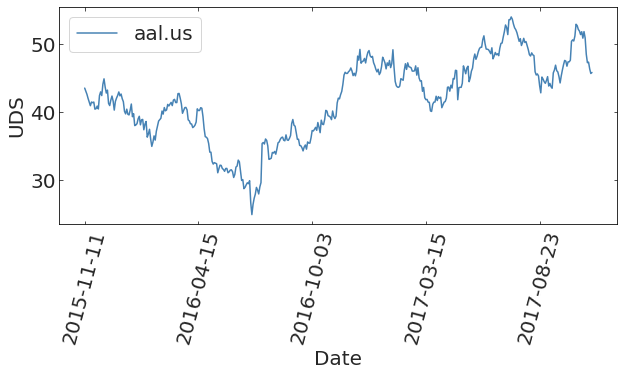

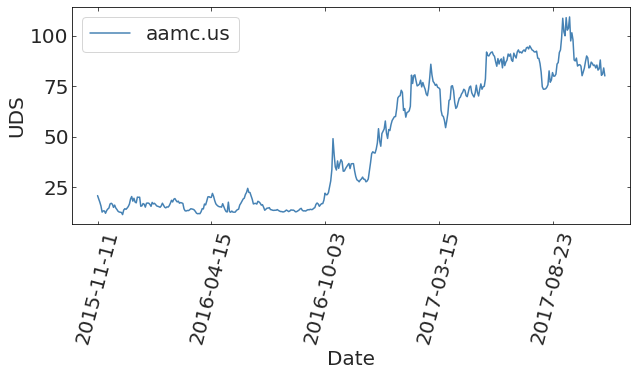

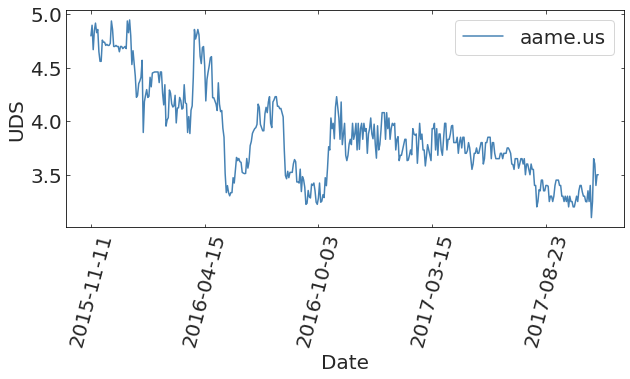

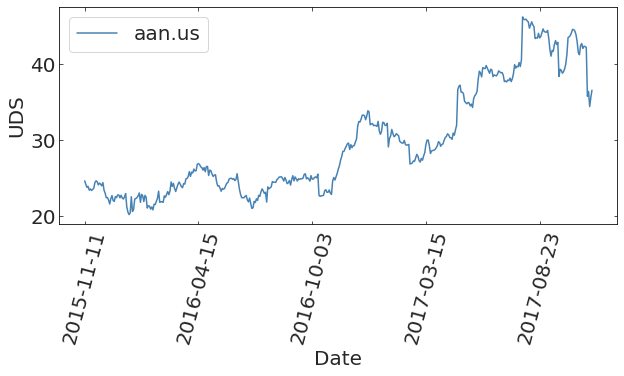

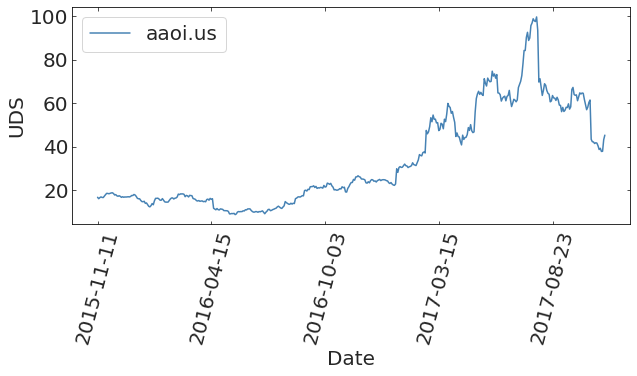

In [ ]:
for c in tss.columns:
    fig, ax = pl.subplots(figsize=(10,4))
    tss.plot(y=c, ax=ax, rot=75)
    ax.set_ylabel("UDS")

tss.shape

Fig 1: Stock daily close value for 10 stocks between 11/11/2015 and 11/10/2017 in USD for 10 stocks, the first 10 in alphabetical order in the data avaialble at https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


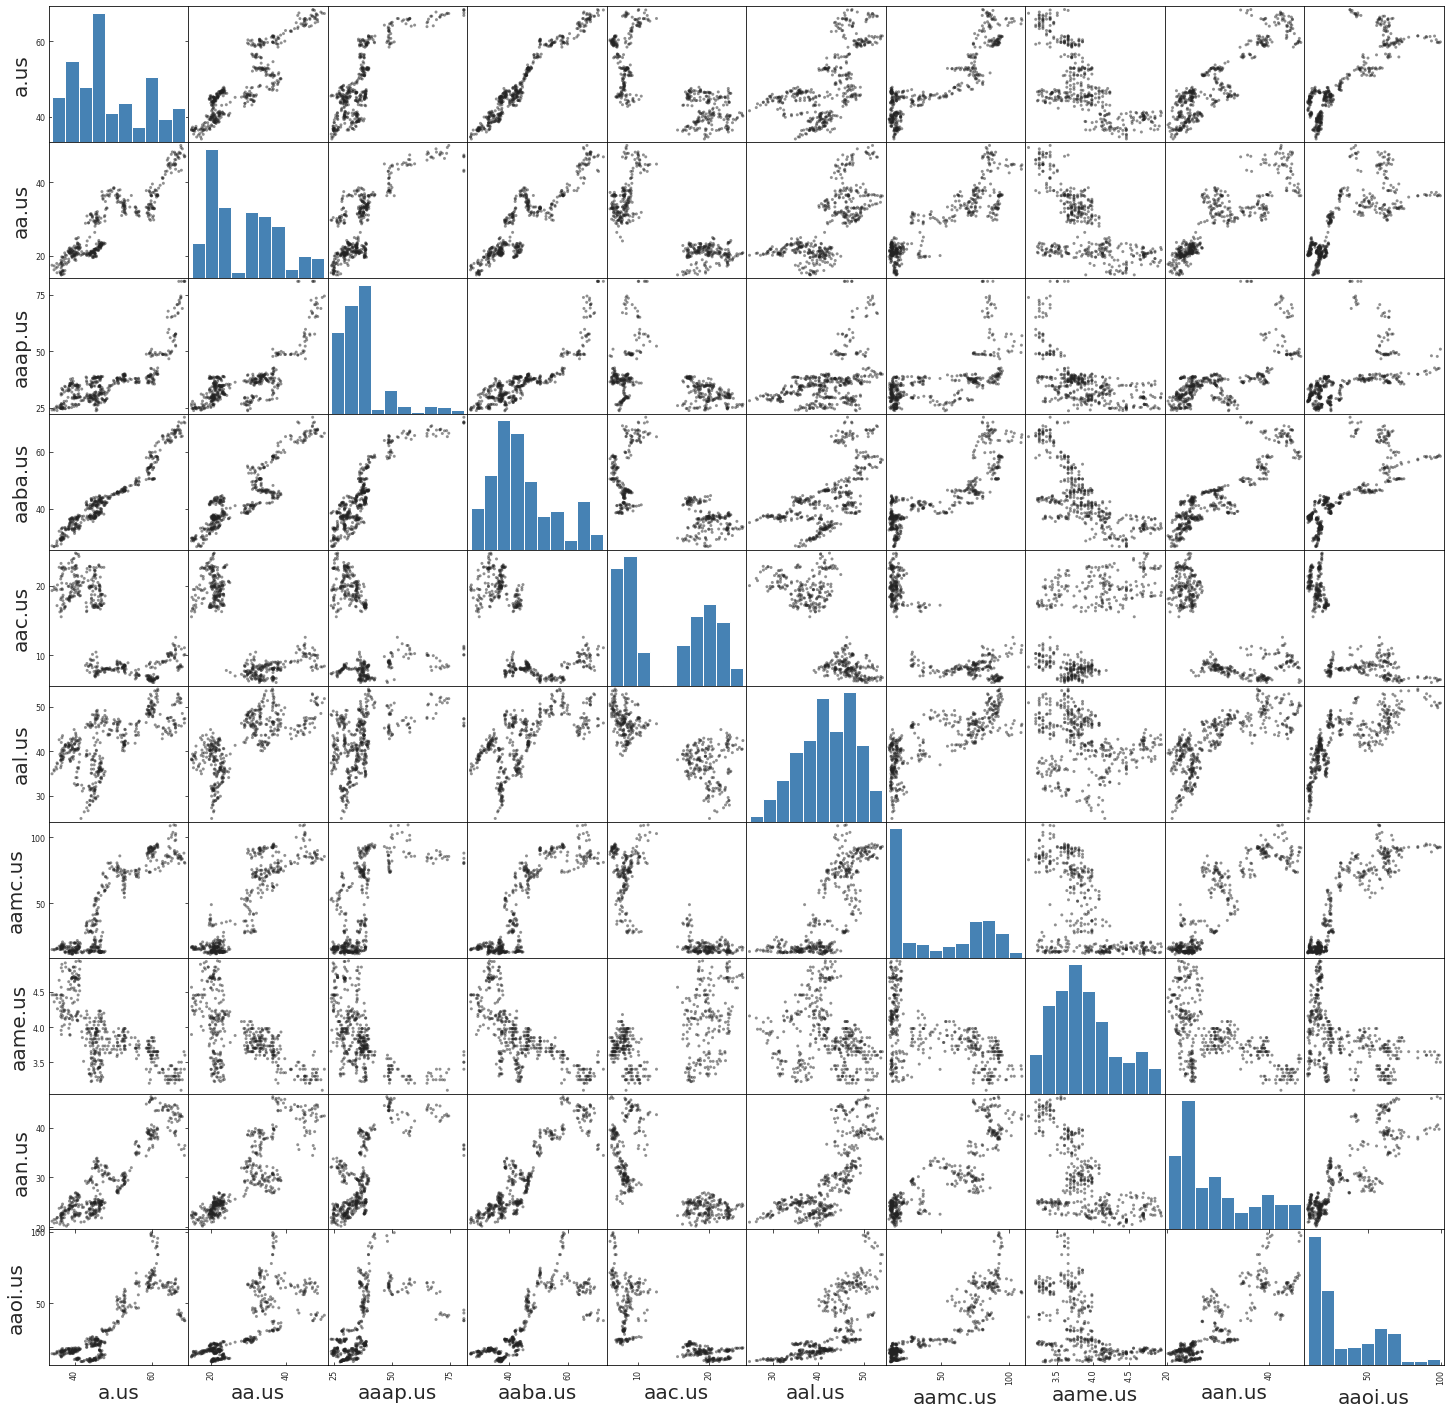

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: Scatter matrix showing the distribution and correlations of closing stock price time series from the dtaset shown in Fig 1. The diagonal cells show a histogram of the price in the two-year time period considered, between November 2015 and 2017. The off diagonal cells show the pair-wise correlation of the stock=price time series. Several time series display behaviors significantly different from a bell-curve, and therefore inconsistent with a stationary stockastic behavior. While most pairs dhow a generally positive correlation, with different degree of strength, aame.us shows an inverse, albeit noisy, correlation with most time series. A correlation matrix would help confirm this visual result.

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


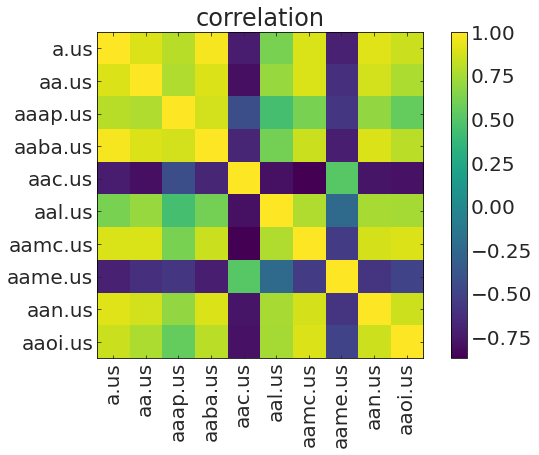

In [ ]:
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);


Fig 3: Pairwise Pearson correolation coefficient of the time series shown in Figure 1. Most time series show a positive correlation, but aame.us and aaba.us show a negative correlation with all other time series. The most strongly correlated series are a.us and aabe.us (r = 0.97), and most strongly inversely correlated time xeries are aac.us and aamc.us (r = -0.87). 

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [ ]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
